# Early Stopping
**Early stopping is a regularization technique used to prevent overfitting by terminating the training process when the model's performance on a validation set starts to degrade.**

### Why we use early stopping
1. **Prevent Overfitting:** Stops training before the model starts overfitting to the training data.
2. **Save Resources:** Reduces training time and computational resources by avoiding unnecessary epochs.
3. **Improve Generalization:** Helps the model generalize better to unseen data by stopping at the optimal point.
4. **Monitor Performance:** Provides a mechanism to monitor validation performance and stop training when improvements plateau.
5. **Automatic Control:** Automatically determines the best number of training epochs without manual intervention.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

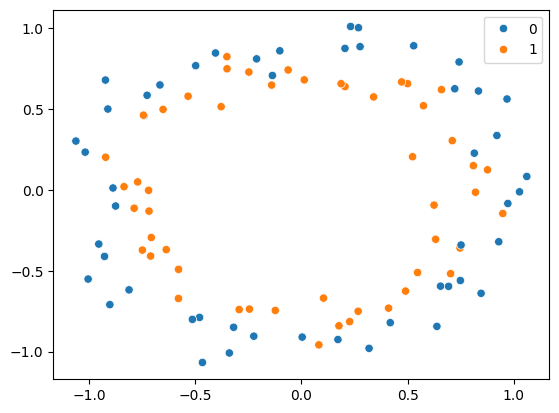

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

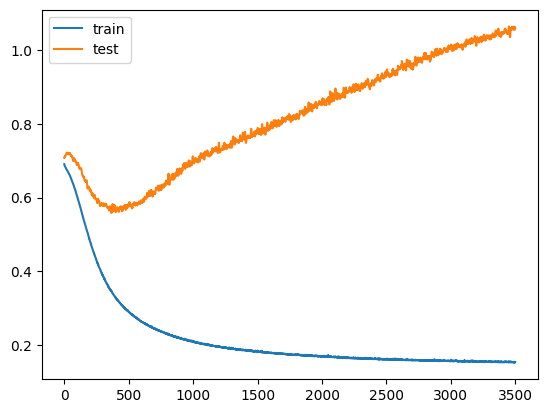

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#### Here we can see that model got overfitted!!

9600/9600 [==============================] - 13s 1ms/step


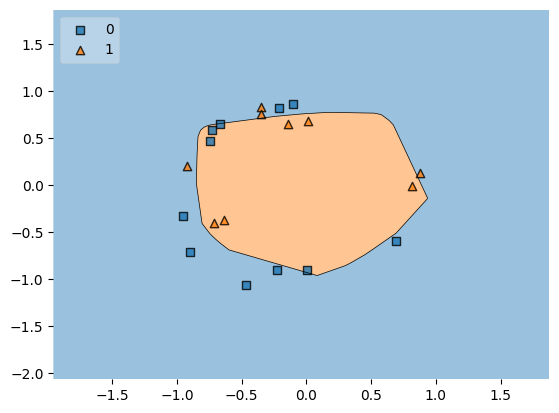

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [52]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [59]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 235ms/step - loss: 0.6753 - accuracy: 0.5750 - val_loss: 0.7170 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 75ms/step - loss: 0.6749 - accuracy: 0.5750 - val_loss: 0.7167 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 143ms/step - loss: 0.6743 - accuracy: 0.5625 - val_loss: 0.7165 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 155ms/step - loss: 0.6737 - accuracy: 0.5625 - val_loss: 0.7172 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 134ms/step - loss: 0.6731 - accuracy: 0.5625 - val_loss: 0.7168 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 138ms/step - loss: 0.6723 - accuracy: 0.5625 - val_loss: 0.7167 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 115ms/step - loss: 0.6719 - accuracy: 0.5625 - val_loss: 0.7163 - val_accuracy: 0.3500
Epoch 8

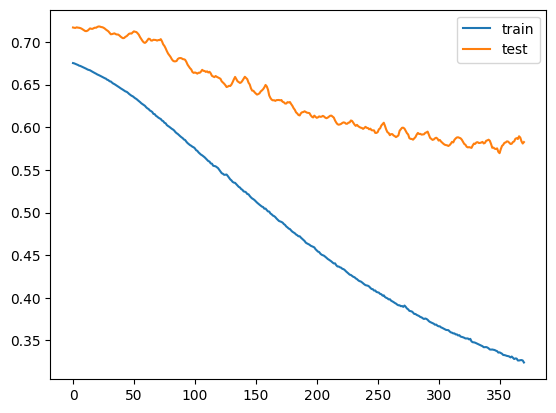

In [60]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### using early stopping we stopped at 371 epoch where model started overfitting

9600/9600 [==============================] - 13s 1ms/step


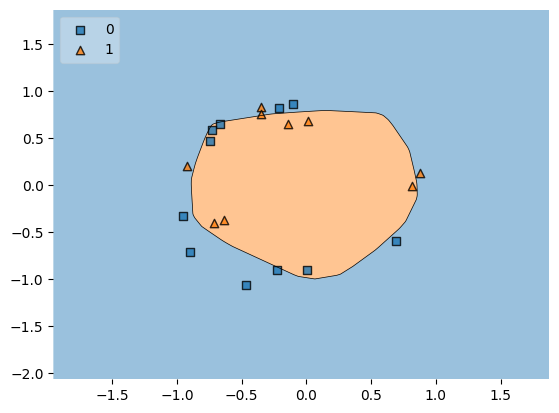

In [61]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()